<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Deep_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Neural Networks for Regression

In [27]:
import time
import torch
import numpy as np
from torch import nn
import torch as d2l

In [43]:
pip install -U d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
  

In [28]:
#Class definition
def add_to_class(Class):
  def wrapper(Obj):
    setattr(Class, Obj.__name__, Obj )
  return wrapper


In [29]:
class A:
  def __init__(self):
    self.b = 1

a = A()
print(a)

In [30]:
@add_to_class(A)
def do(self):
  print("Class attribute b is ", self.b)


a.do()

Class attribute b is  1


In [31]:
@add_to_class(A)
def do(self):
  print("Class attribute 'b' is ", self.b)

a.do()

Class attribute 'b' is  1


In [32]:
#define a saving class
class HyperParameters:
  def save_hyperparameters(self, ignore = []):
    raise NotImplemented

In [1]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
class B(d2l.HyperParameters):
  def __init__(self, a, b, c):
    self.save_hyperparameters(ignore=["c"])
    print(f"self.a = {self.a}, self.b = {self.b}")
    print("There is no self.c", not hasattr(self, "c"))


b = B(a = 1, b = 2, c = 3)

self.a = 1, self.b = 2
There is no self.c True


"""The final utility allows us to plot experiment progress interactively while it is going on.
In deference to the much more powerful (and complex) TensorBoard 71 we name it ProgressBoard. The implementation is deferred to Section B.7. For now, let’s simply see it
in action"""
#The draw method plots a point (x, y) in the figure, with label specified in the legend.
The optional every_n smooths the line by only showing 1/𝑛 points in the figure. Their
values are averaged from the 𝑛 neighbor points in the original figure

In [8]:
class ProgressBoard(d2l.HyperParameters):
  def __init__(self, xlabel = None, ylabel = None, xlim = None, ylim = None, xscale = "linear", yscale = "linear", ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'], fig = None, axes = None, figsize = (5, 4.5), display = True):
    self.save_hyperparameters()
  def draw(self, x, y, label, every_n = 1):
    raise NotImplemented

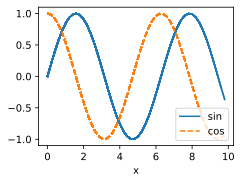

In [13]:
#In the following example, we draw sin and cos with a different smoothness.
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.2):
  board.draw(x, np.sin(x), label = "sin", every_n = 1)
  board.draw(x, np.cos(x), label = "cos", every_n = 1)


#Models

#The Module class is the base class of all models we will implement. At the very least we need three methods. The first, __init__, stores the learnable parameters, the training_step method accepts a data batch to return the loss value, and finally, configure_optimizers returns the optimization method, or a list of them, that is used to update the learnable parameters. Optionally we can define validation_step to report the evaluation measures. Sometimes we put the code for computing the output into a separate forward method to make it more reusable

In [14]:
class Module(nn.Module, d2l.HyperParameters):
  #the base class of models
  def __init__ (self, plot_train_per_epoch = 2, plot_valid_per_epoch = 1):
    super().__init__()
    self.save_hyperparameters()
    self.board = ProgressBoard
  def loss(self, y_hat, y):
    raise NotImplemented
  def forward(self, X):
    assert hasattr(self, "net"), "neural network is defined"
    return self.net(X)
  def plot(self, key, value, train):
    """Ploting a point in animation."""
    assert hasattr(self, "trainer"), "trainer is not inited"
    self.board.xlabel = "epoch"
    if train:
      x = self.trainer.train_batch_idx / \
          self.trainer.num_train_batches
      n = self.num_train_batches / \
          self.plot_train_per_epoch
    else:
      x = self.trainer.epopch + 1
      n = self.trainer.num_valid_epochs / \
          self.plot_valid_per_epoch
    self.board.draw(x, value.to(d2l.cpu()).detach().numpy(), ("train_" if train else "val_") + key, every_n = int(n))
    def training_step(self, batch):
      l = self.loss(self(*batch[:-1]), batch[-1])
      self.plot("loss", l, train = True)
    def configure_optimizer(self):
      raise NotImplemented

 #Data

 """ The DataModule class is the base class for data. Quite frequently the __init__ method is
used to prepare the data. This includes downloading and preprocessing if needed. The
train_dataloader returns the data loader for the training dataset. A data loader is a
(Python) generator that yields a data batch each time it is used. This batch is then fed
into the training_step method of Module to compute the loss. There is an optional
val_dataloader to return the validation dataset loader. It behaves in the same manner,
except that it yields data batches for the validation_step method in Module. """

In [15]:
class DataLoader(d2l.HyperParameters):
  def __init__(self, root = "../data", num_workers = 4):
    def get_data_loader(self, train):
      raise NotImplemented
    def train_data_loader(self):
      return self.get_data_loader(train = True)
    def val_data_loader(self):
      return self.get_data_loader(train = False)


#Training

In [ ]:
class Trainer(d2l.HyperParameters):
  #"The base class for training models with data."""
